In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("../data/processed_data/CREMP_Pcover_2023_TaxaGroups.csv")

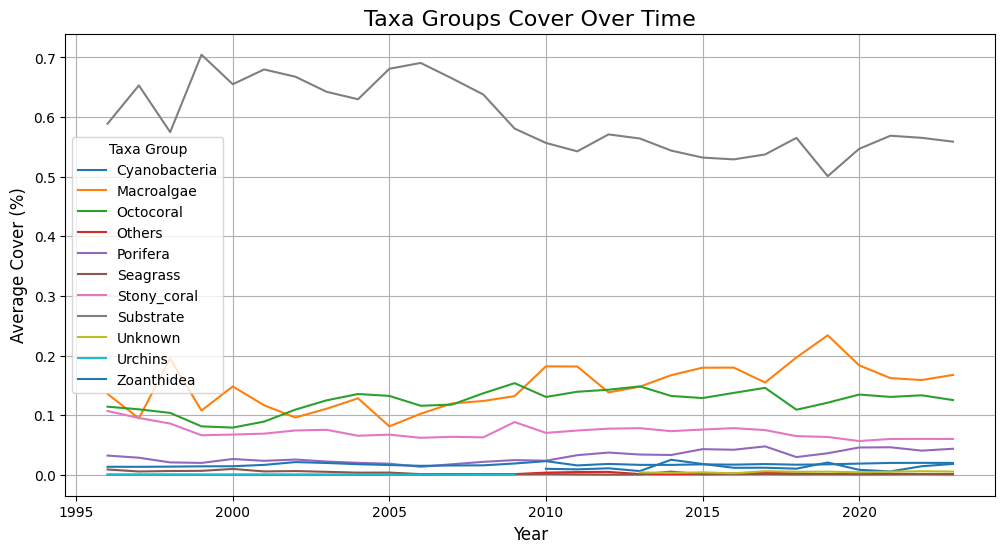

In [4]:
# 1. Taxa Groups Cover Over Time (Line Plot)
taxa_columns = ['Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 'Porifera', 'Seagrass', 'Stony_coral', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea']

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Calculate the average cover by year for each taxa group
cover_over_time = data[['Year'] + taxa_columns].groupby('Year').mean().reset_index()

# Plot the taxa cover over time for selected groups
plt.figure(figsize=(12, 6))
for taxa in taxa_columns:
    sns.lineplot(x='Year', y=taxa, data=cover_over_time, label=taxa)
plt.title('Taxa Groups Cover Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Cover (%)', fontsize=12)
plt.legend(title='Taxa Group')
plt.grid(True)
plt.savefig("../plots/taxa_groups_cover_over_time.png")
plt.show()
plt.close()

C:\Users\Elite\AppData\Local\Temp\ipykernel_16876\870291741.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Taxa Group', y='Average Cover', data=taxa_cover, palette='viridis')


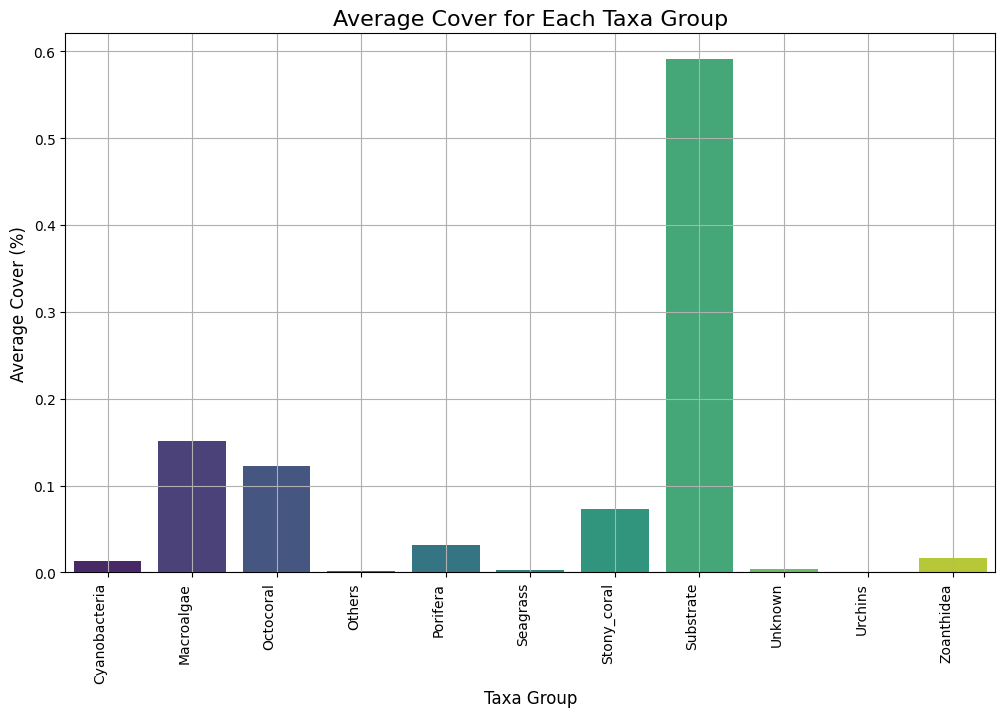

In [ ]:
# 2. Average Cover for Each Taxa Group (Bar Plot)
taxa_cover = data[taxa_columns].mean().reset_index(name='Average Cover')
taxa_cover.columns = ['Taxa Group', 'Average Cover']

# Plot the average taxa group cover
plt.figure(figsize=(12, 7))
sns.barplot(x='Taxa Group', y='Average Cover', data=taxa_cover, palette='viridis')
plt.title('Average Cover for Each Taxa Group', fontsize=16)
plt.xlabel('Taxa Group', fontsize=12)
plt.ylabel('Average Cover (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.savefig("../plots/taxa_groups_cover_by_species.png")
plt.show()
plt.close()